<a href="https://colab.research.google.com/github/rakeshindukuri/projects/blob/main/cancer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn import metrics
from pandas.plotting import scatter_matrix
import time
from subprocess import check_output
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [12]:
# Loading Data
data = pd.read_csv("cancer_analysis.csv", header=0)
del data['Unnamed: 32']

In [13]:
# Visualization and Correlation

list = ['id','diagnosis']
x = data.drop(list, axis=1)
y = data.diagnosis
B, M = y.value_counts()
print(B, M)
data.describe()

357 212


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
# Loading Data
data = pd.read_csv("cancer_analysis.csv", header=0)
# Dropping Unnamed, ID
data.drop("Unnamed: 32", axis=1, inplace=True)
data.drop("id", axis=1, inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

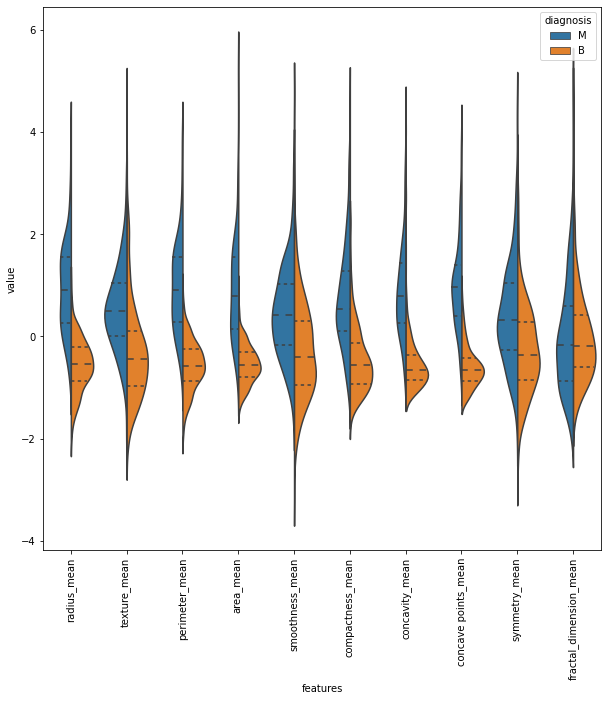

In [15]:
# We need to standardized/ Normalized

# First 10
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
# standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

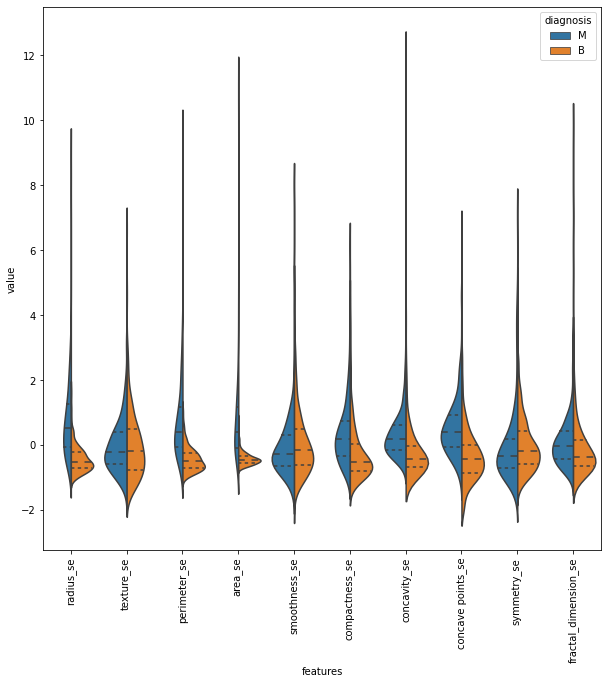

In [16]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

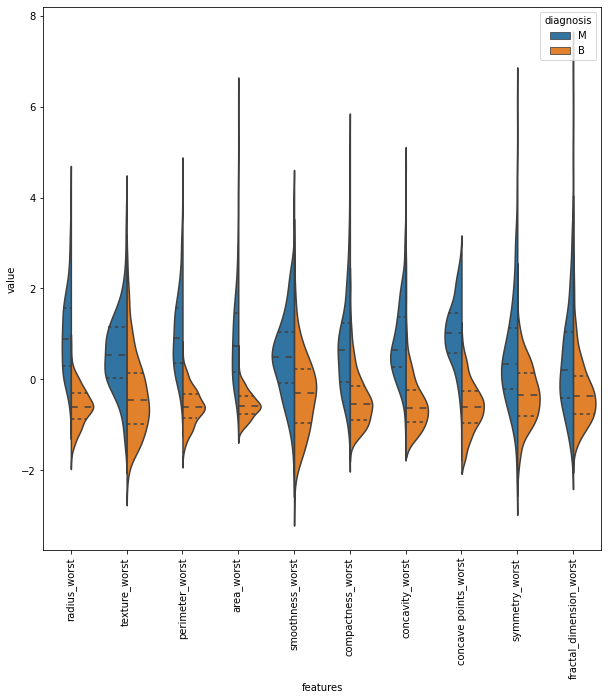

In [17]:
# third ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

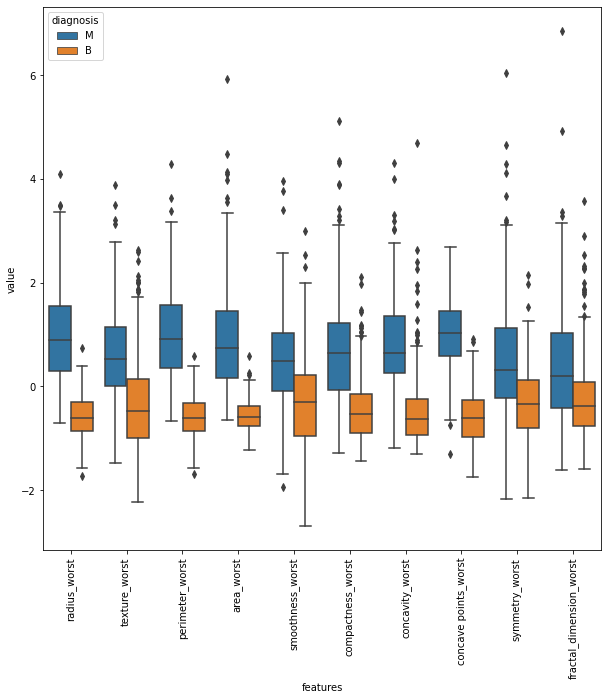

In [18]:
# Box plots instead:

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

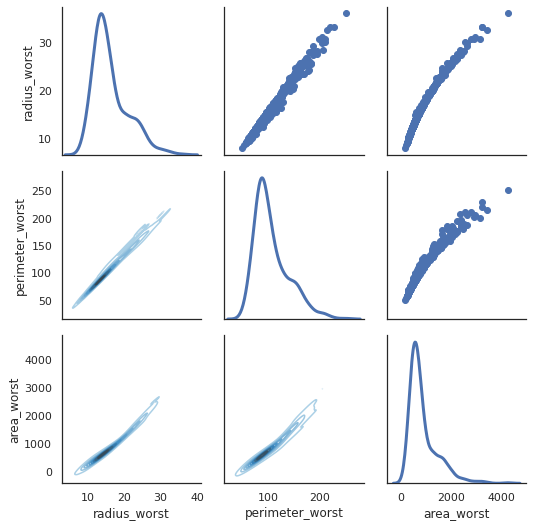

In [20]:
# Three feature comparision:

sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

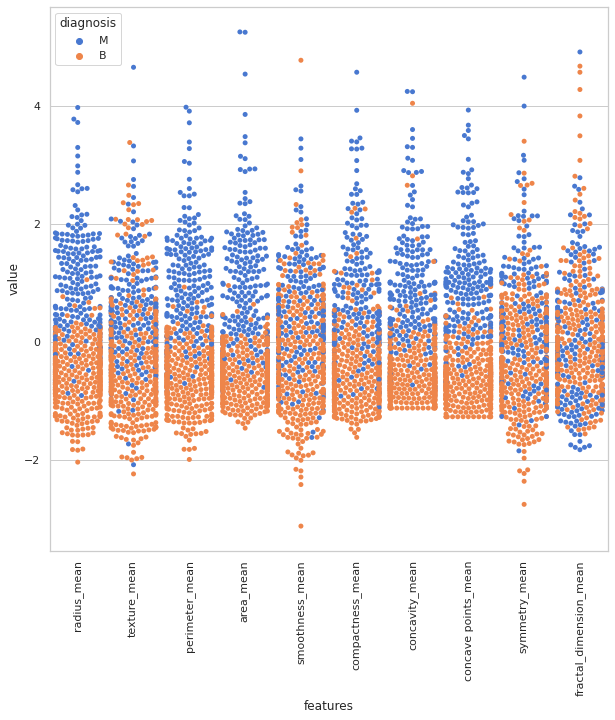

In [21]:
# Swarm plot:

sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

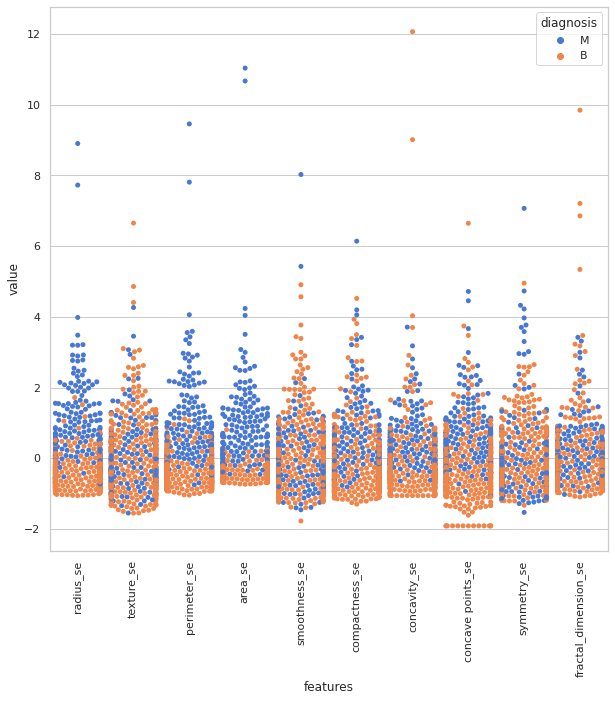

In [22]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  49.985103607177734  s


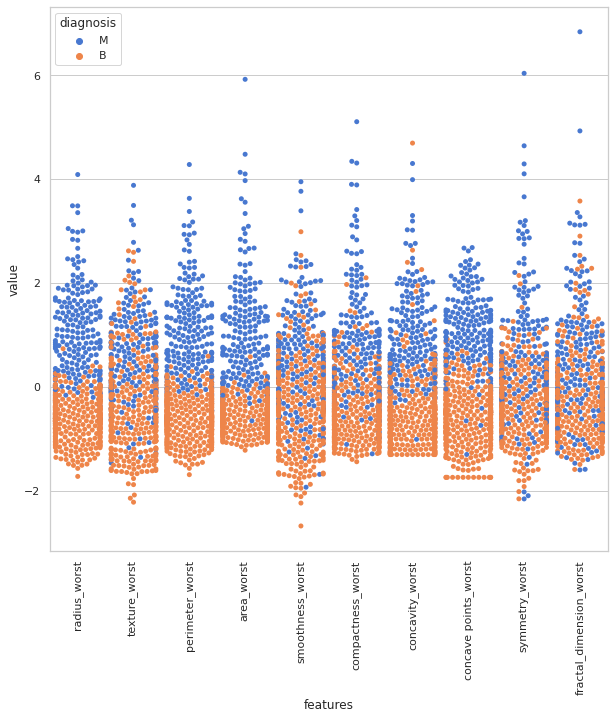

In [23]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

<Axes: >

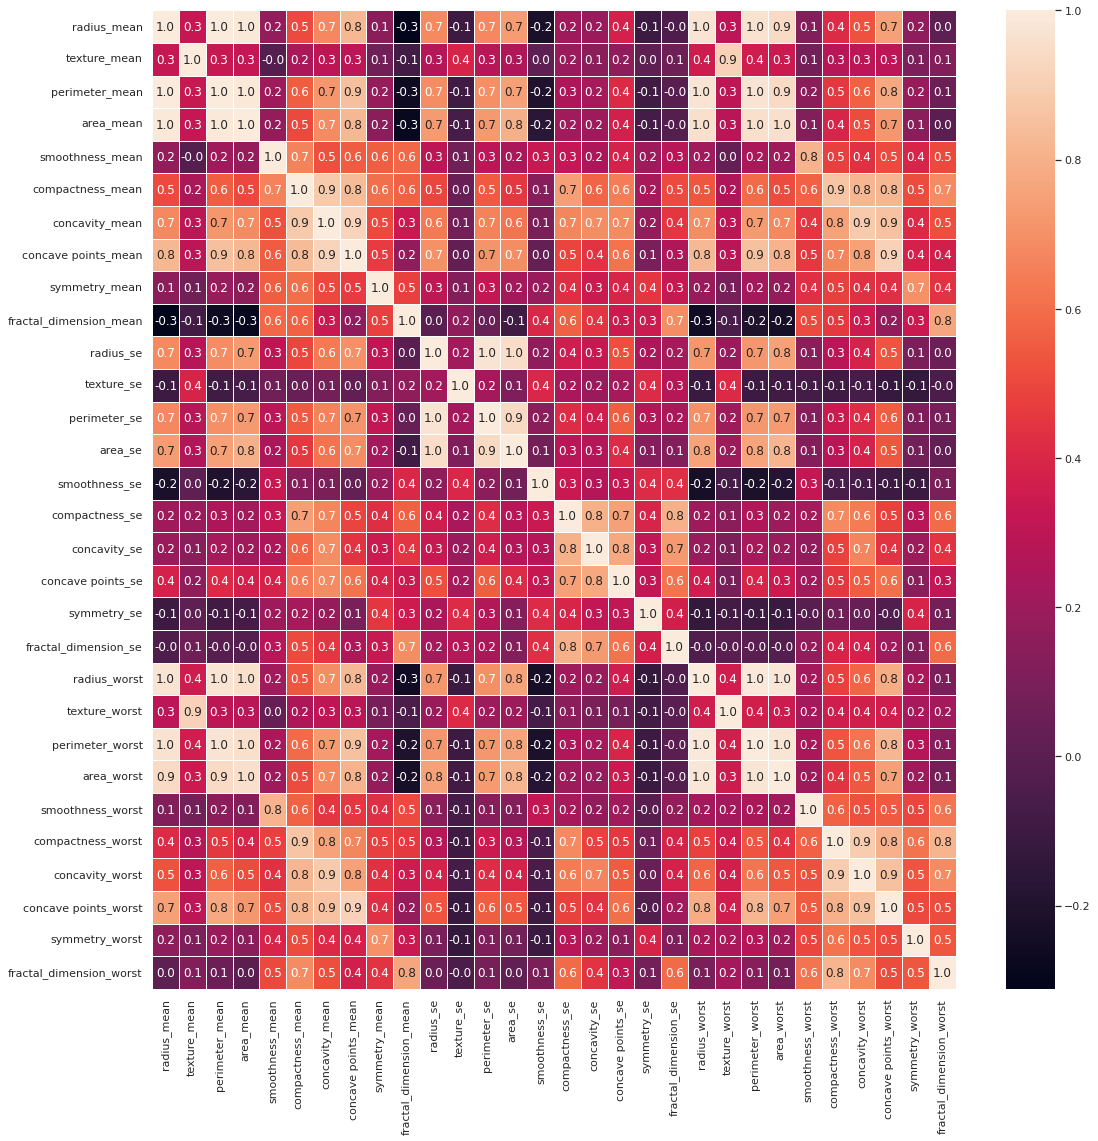

In [24]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [25]:
# Logistic regression, SVM, Decision Trees, Random Forest
dataset = pd.read_csv('cancer_analysis.csv')
x = dataset.iloc[:,2:29].values
y = dataset.iloc[:,1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [26]:
# Calc Z score so all values will be in same scale. SCALING
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [27]:
# Logisitc Regression
from sklearn.linear_model import LogisticRegression

lc = LogisticRegression()
lc.fit(x_train, y_train)
y_preds = lc.predict(x_test)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_preds))

[[96  2]
 [ 0 45]]


In [28]:
# Support Vector Machines

from sklearn.svm import SVC

svm = SVC(kernel = "rbf")
svm.fit(x_train, y_train)
y_preds = svm.predict(x_test)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_preds))

[[96  2]
 [ 0 45]]


In [29]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train, y_train)

y_preds = tree.predict(x_test)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_preds))

[[91  7]
 [ 1 44]]


In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, criterion="entropy")
forest.fit(x_train, y_train)
y_preds = forest.predict(x_test)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_preds))

[[93  5]
 [ 0 45]]


In [31]:
data = pd.read_csv("cancer_analysis.csv", header=0)
data.drop("Unnamed: 32", axis=1, inplace=True)
data.drop("id", axis=1, inplace=True)

# Dividing into mean, se, worsts
features_mean = data.columns[1:11].tolist()
features_se = data.columns[11:21].tolist()
features_worst = data.columns[21:31].tolist()

array([[<Axes: xlabel='radius_mean', ylabel='radius_mean'>,
        <Axes: xlabel='texture_mean', ylabel='radius_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='radius_mean'>,
        <Axes: xlabel='area_mean', ylabel='radius_mean'>,
        <Axes: xlabel='smoothness_mean', ylabel='radius_mean'>,
        <Axes: xlabel='compactness_mean', ylabel='radius_mean'>,
        <Axes: xlabel='concavity_mean', ylabel='radius_mean'>,
        <Axes: xlabel='concave points_mean', ylabel='radius_mean'>,
        <Axes: xlabel='symmetry_mean', ylabel='radius_mean'>,
        <Axes: xlabel='fractal_dimension_mean', ylabel='radius_mean'>],
       [<Axes: xlabel='radius_mean', ylabel='texture_mean'>,
        <Axes: xlabel='texture_mean', ylabel='texture_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='texture_mean'>,
        <Axes: xlabel='area_mean', ylabel='texture_mean'>,
        <Axes: xlabel='smoothness_mean', ylabel='texture_mean'>,
        <Axes: xlabel='compactness_mean', ylabel='tex

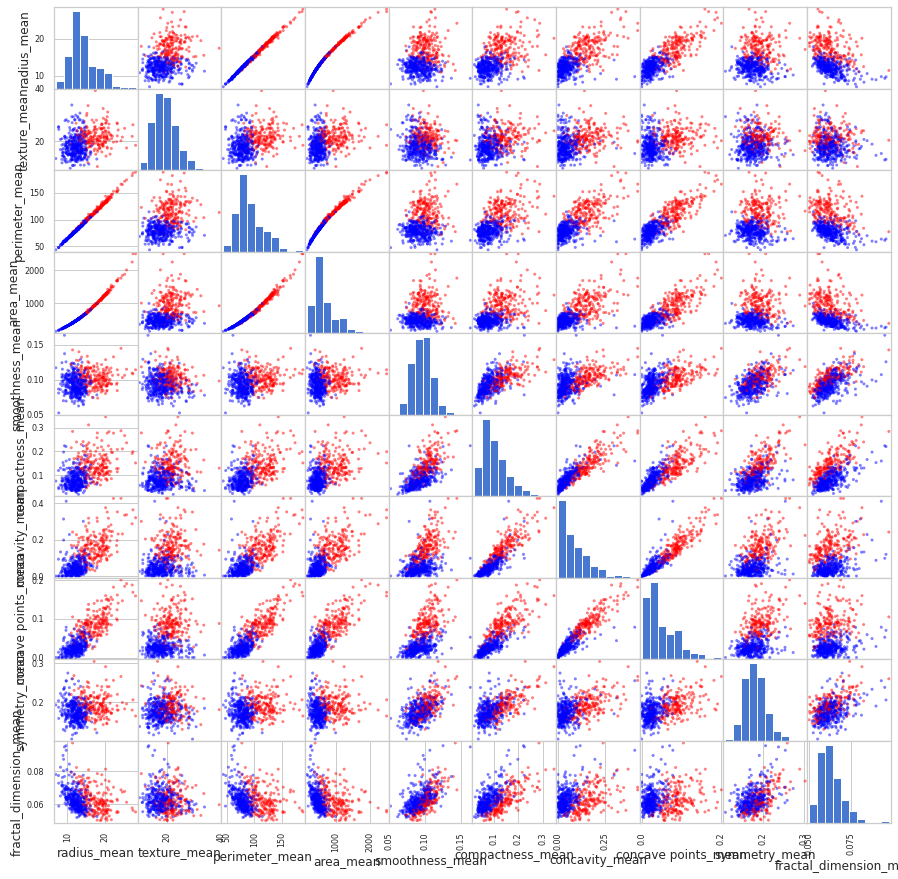

In [32]:
# map diagnosis to 0,1
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
color_function = {0:"blue", 1:"red"}
colors = data["diagnosis"].map(lambda x:color_function.get(x))
scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15))

In [33]:
# Only 2 of these deep in detail
prediction_var = ['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']

# MEAN first 10 analysis with selected mean features based on corr
# Splitting to train and test
train, test = train_test_split(data, test_size=0.25)
train_X = train[prediction_var]
train_y = train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [34]:
# Random Forest Classifier
RFCmodel = RandomForestClassifier(n_estimators=100)
RFCmodel.fit(train_X, train_y)

RFCprediction = RFCmodel.predict(test_X)

metrics.accuracy_score(RFCprediction, test_y)


0.916083916083916

In [35]:
# Support Vector Machines
SVMmodel = SVC(kernel="rbf")
SVMmodel.fit(train_X, train_y)
SVMprediction = SVMmodel.predict(test_X)
metrics.accuracy_score(SVMprediction, test_y)

0.8601398601398601

In [36]:
# Entire MEAN as prediction instead of selected. See which is better and explain
# All features: Random forest
prediction_var = features_mean
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8951048951048951

In [37]:
# NExt chapter with feature importance on both models
# Feature importance
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.332684
perimeter_mean            0.181801
area_mean                 0.131665
concavity_mean            0.107683
radius_mean               0.106260
texture_mean              0.054004
compactness_mean          0.034362
smoothness_mean           0.027072
fractal_dimension_mean    0.013197
symmetry_mean             0.011272
dtype: float64


In [38]:
# Normal SVM
model = SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8321678321678322

In [39]:
# Both algos with prediction var top 5 features
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']  
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis


In [40]:
# Random forest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8741258741258742

In [41]:
# SVM
model = SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8251748251748252

In [42]:
# -----------------------------------------

# Do same above for features worst 3rd set because of plots...

In [43]:
# Entire worst set both algos
prediction_var = features_worst
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [44]:
# SVM
model = SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8741258741258742

In [45]:
# Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.972027972027972

In [46]:
# Feature importance
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

perimeter_worst            0.221021
area_worst                 0.206508
radius_worst               0.189771
concave points_worst       0.184731
compactness_worst          0.052224
concavity_worst            0.047228
texture_worst              0.041032
symmetry_worst             0.024325
smoothness_worst           0.019387
fractal_dimension_worst    0.013772
dtype: float64


In [47]:
prediction_var = ['perimeter_worst','radius_worst','area_worst', 'concave points_worst']
train_X = train[prediction_var]
train_y = train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis


model=RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction, test_y)


0.958041958041958

In [48]:
prediction_var = features_worst
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.965034965034965

<Axes: >

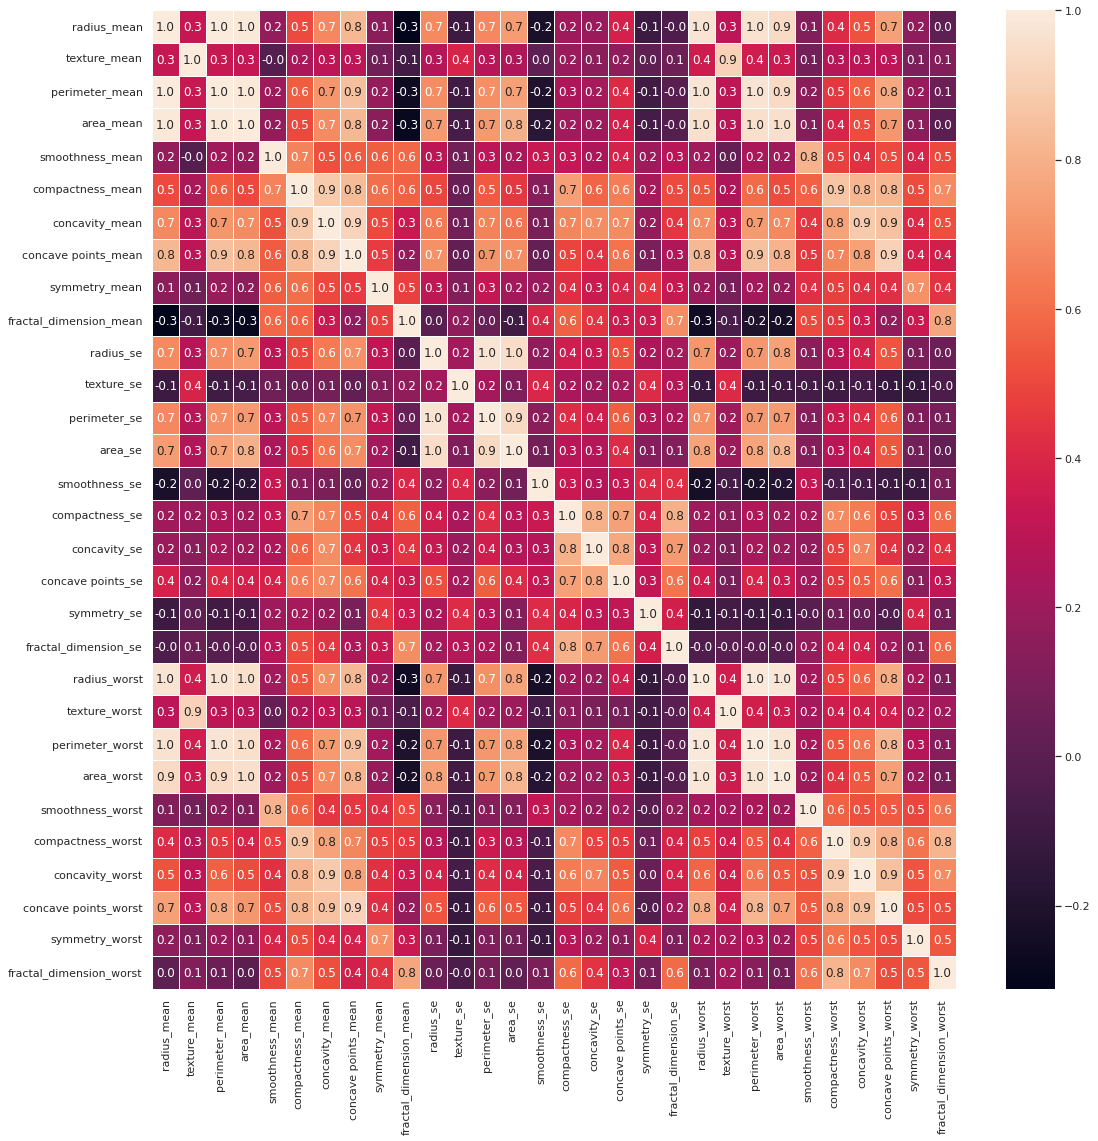

In [50]:
data = pd.read_csv('cancer_analysis.csv')
col = data.columns
y = data.diagnosis
list = ['Unnamed: 32', 'id','diagnosis']
x = data.drop(list, axis=1)
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)



In [51]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<Axes: >

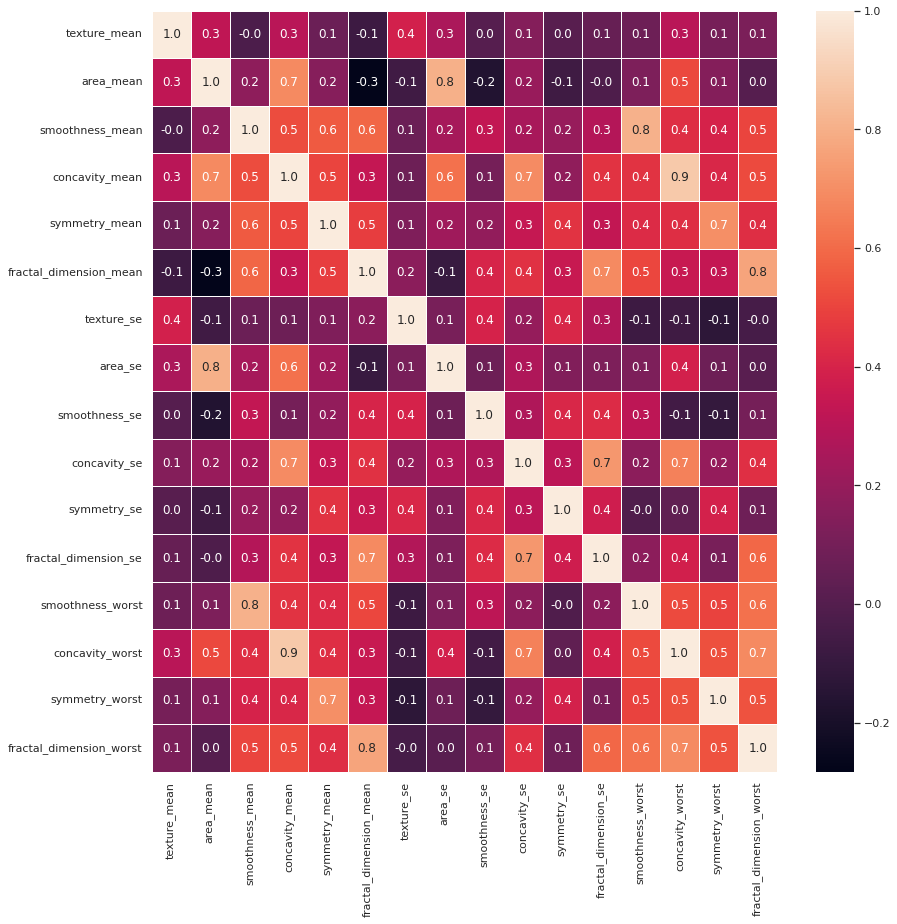

In [52]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.9532163742690059


<Axes: >

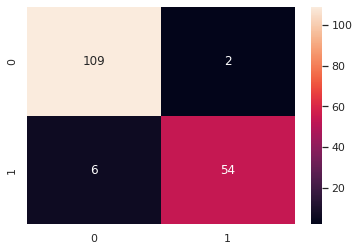

In [53]:
# PCA w/ types of Random Forest

# Correlation, Random Forest Cl:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3)

#random forest classifier
clf_rf = RandomForestClassifier(n_estimators=100)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")


In [54]:
# Univariate feature selection and Random forest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.93362559e+01 4.01054195e+04 1.07900845e-01 1.41147459e+01
 1.59065176e-01 7.82754923e-05 5.52027547e-02 6.61897861e+03
 5.05795445e-03 7.84517852e-01 2.99475616e-03 7.64473216e-03
 2.83199421e-01 2.78714684e+01 7.78582844e-01 1.68501119e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9064327485380117


<Axes: >

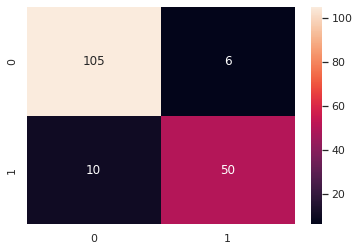

In [55]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(n_estimators=100)      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")


In [56]:
# Recursive feature elimination with Random Forest:

from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_se',
       'concavity_worst'],
      dtype='object')


In [57]:
# Recursive feature elimination with cross validation and Random forest cl:

from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 12
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


In [58]:
prediction_var=['texture_mean', 'area_mean', 'concavity_mean', 'texture_se', 'area_se', 'concavity_se', 'symmetry_se', 'smoothness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

train_X, test_X, train_y, test_y = train_test_split(x_1[prediction_var], y, test_size=0.3)
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9532163742690059

Feature ranking:
1. feature 1 (0.256712)
2. feature 7 (0.200577)
3. feature 3 (0.162075)
4. feature 13 (0.140191)
5. feature 0 (0.043165)
6. feature 12 (0.042170)
7. feature 9 (0.031012)
8. feature 14 (0.025301)
9. feature 2 (0.016347)
10. feature 5 (0.013749)
11. feature 10 (0.013747)
12. feature 15 (0.012115)
13. feature 11 (0.012042)
14. feature 4 (0.010587)
15. feature 8 (0.010434)
16. feature 6 (0.009776)


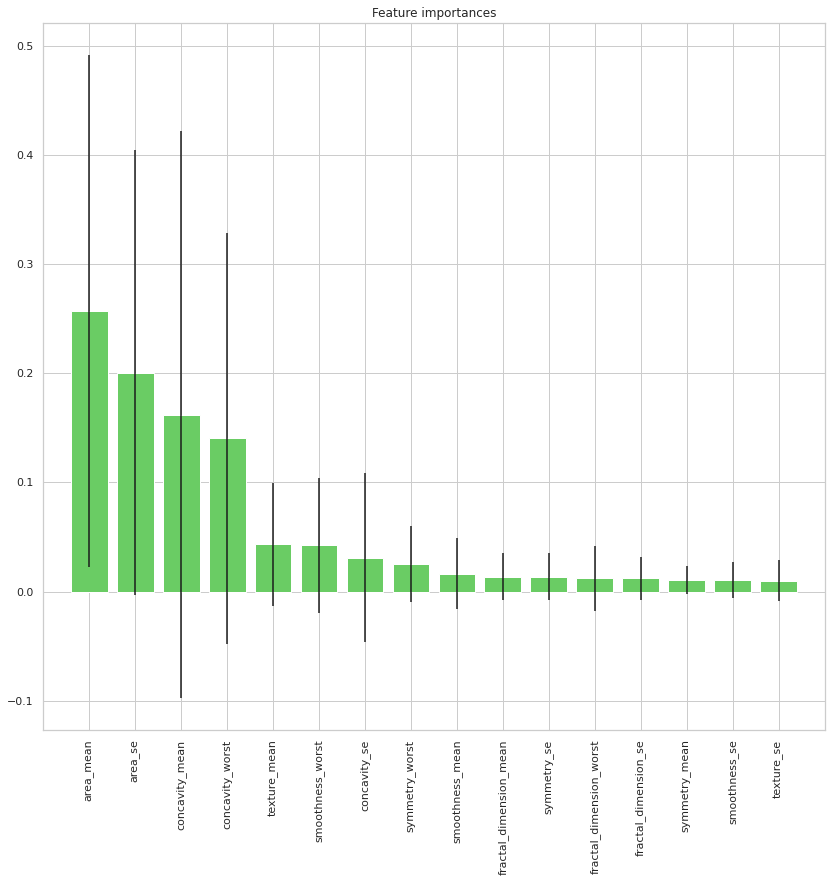

In [59]:
# Tree based feature selection and Random Forest classification:

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Text(0, 0.5, 'explained_variance_ratio_')

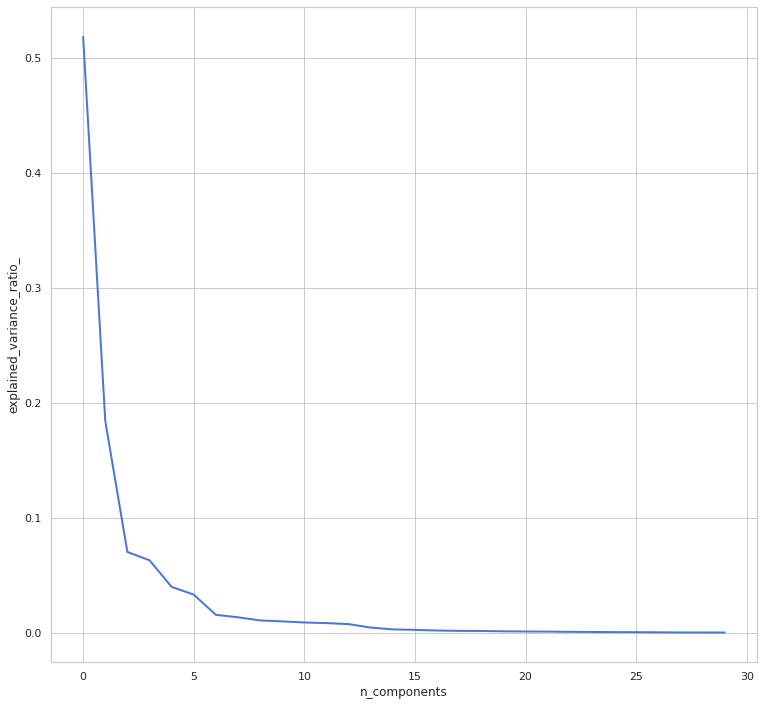

In [60]:
# FEATURE EXTRACTION with PCA

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [61]:
# Exploring Gradient boosting and xgboost with PCA
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify = y)

In [62]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [63]:
# Optimization
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

x_train_scaled = pca.fit_transform(x_train)

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_preds = gb.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[66  6]
 [ 2 40]]


In [64]:
# Xtreme gadient boosting

from xgboost import XGBClassifier

# Need to transform the y_train value to fit xgboost, it starts from 0 but not 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_preds = gb.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))


[[66  6]
 [ 2 40]]


In [65]:
# ANN Part:

# We take diagnosis as y, and rest of all as x
data = pd.read_csv('cancer_analysis.csv')
del data['Unnamed: 32']
x = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data: Label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [66]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

ANN Without Feature scaling: Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.4531
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.3828
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.3887
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.3906
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.5391
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.6719
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6582
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.8203
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.8516
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.8301


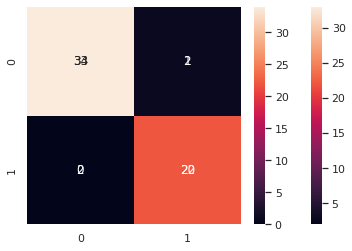

In [67]:
def do_ANN():
  # Initialising the ANN
  classifier = Sequential()
  # Adding the input layer and the first hidden layer
  classifier.add(Dense(16, activation='relu', kernel_initializer='uniform',input_dim=30))
  # Adding dropout to prevent overfitting
  classifier.add(Dropout(rate=0.1))
  # Adding the second hidden layer
  classifier.add(Dense(16, kernel_initializer='uniform', activation='relu'))
  # Adding dropout to prevent overfitting
  classifier.add(Dropout(rate=0.1))
  # Adding the output layer
  classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  # Compiling the ANN
  classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  # Fitting the ANN to the Training set
  classifier.fit(x_train, y_train, batch_size=100, epochs=100)

  # Predicting the Test set results
  y_pred = classifier.predict(x_test)
  y_pred = (y_pred > 0.5)
  # Making the Confusion Matrix
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y_test, y_pred)

  sns.heatmap(cm,annot=True)

print("ANN Without Feature scaling: ", end="")
do_ANN()
#Feature Scaling with standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print("ANN With Feature scaling: ", end="")
do_ANN()


In [67]:
# IMP: Feature scaling increased accuracy